# Demo Bat Signal

In [1]:
import matlab.engine
import numpy as np
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean

from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.benchmark_utils import MatlabInterface

import sys
import os

In [2]:
# Load the signal
# Import a .mat file from Matlab where the signal is stored.
filename = './bat_signal/batsig.mat'
batsignal = loadmat(filename)
x = batsignal['batsig'][:,0]
N = len(x)
Ncomps = 3
Sbatsig, Fbatsig= get_spectrogram(x,)


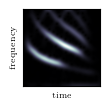

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
sf = 1
fig, ax = plt.subplots(1,1,figsize=(sf,sf))
ax.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone')
ax.set_xlim([0,400])
ax.set_ylim([0,400])
# ax.axis('off')
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

fig.savefig('bat_signal/batsig_spect.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

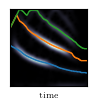

In [4]:
# EM method
from methods.method_EM import NewMethod
em_method = NewMethod().method
step_r =  30
step_v =  1
ifs_em = em_method(x,Ncomps,[],20,[],step_r,step_v,[],True,False)
fig, ax = plt.subplots(1,1,figsize=(sf,sf))
ax.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone')
ord = np.argsort(np.mean(ifs_em,axis=1))
[ax.plot(ifs_em[j]*2*N,linewidth=1.0) for j in ord]

ax.set_xlim([0,400])
ax.set_ylim([0,400])
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
# ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

fig.savefig('bat_signal/batsig_EM.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  


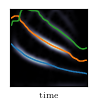

In [5]:
# Nils method
from methods.method_MB_RD import NewMethod
n_method = NewMethod().method
# x, Ncomp, M, approach, sigma_s,
ifs_nm = n_method(x,Ncomps, [], [], 0.09, [], [], True)
fig, ax = plt.subplots(1,1,figsize=(sf,sf))
ax.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone')
ord = np.argsort(np.mean(ifs_nm,axis=1))
[ax.plot(ifs_nm[j]*2*N,linewidth=1.0) for j in ord]

ax.set_xlim([0,400])
ax.set_ylim([0,400])
# ax.axis('off')
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
# ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)
                
fig.savefig('bat_signal/batsig_nils.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

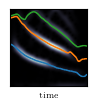

In [6]:
# PB method without SST
from methods.method_PB import NewMethod
pb_method = NewMethod().method
# xr = pb_method(x, Ncomp, use_sst, ds, beta, alpha, div, Pnei, PneiMask)
ifs_pb = pb_method(x, Ncomps, False, [], 0.7, 0.3, [], 15, [], [], [], [],True)
fig, ax = plt.subplots(1,1,figsize=(sf,sf))
ax.imshow(np.abs(Fbatsig[0:N]), origin='lower', cmap='bone')
ord = np.argsort(np.mean(ifs_pb,axis=1))
[ax.plot(ifs_pb[j]*2*N,linewidth=1.0) for j in ord]

ax.set_xlim([0,400])
ax.set_ylim([0,400])
# ax.axis('off')
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
# ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

fig.savefig('bat_signal/batsig_PB.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  